Found 8000 images belonging to 2 classes.


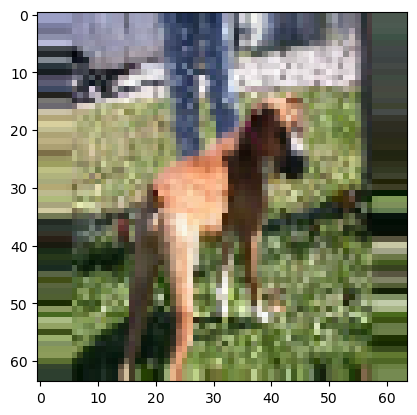

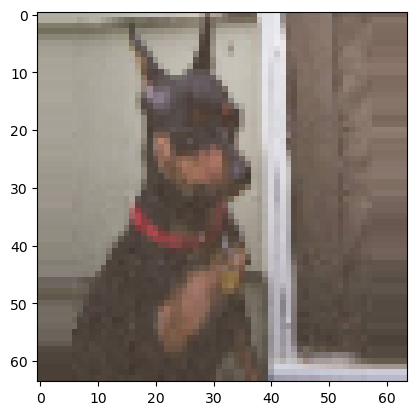

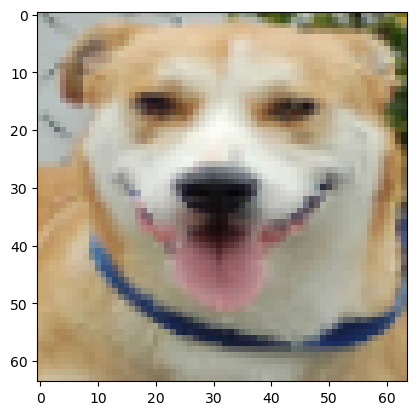

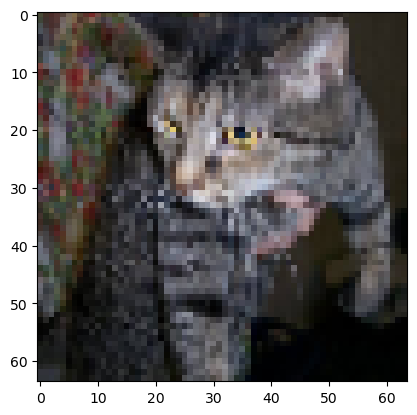

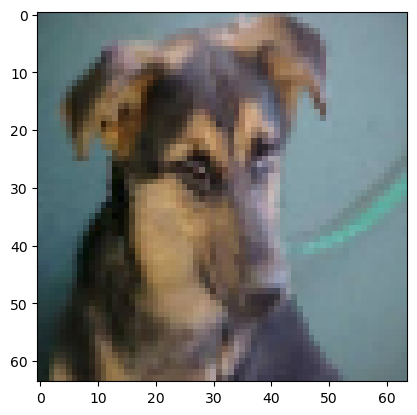

Epoch 1/25


c:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - accuracy: 0.5281 - loss: 0.6981
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.6579 - loss: 0.6171
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.7072 - loss: 0.5602
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.7303 - loss: 0.5275
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.7589 - loss: 0.4986
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.7663 - loss: 0.4779
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.7803 - loss: 0.4618
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.7840 - loss: 0.4538
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.7950 - loss: 0.4239
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.7992 - loss: 0.4307
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.8128 - loss: 0.4055
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
{'cats': 0, 'dogs': 1}
cat


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Feature scaling
    shear_range=0.2,        
    zoom_range=0.2,         
    horizontal_flip=True    
)

training_set = train_datagen.flow_from_directory(
    'CNN_dataset/training_set',
    target_size=(64, 64),    # Low image size to put less load on the machine
    batch_size=32,           # Default value
    class_mode='binary'      # Only 2 outcomes (cat/dog), so binary. Use 'categorical' for multi-class classification
)

# View some images from the training set
for _ in range(5):
    img, label = next(training_set)
    plt.imshow(img[0])
    plt.show()

# Build the CNN model
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compiling the CNN
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the CNN on the Training set
cnn.fit(x=training_set, epochs=25)

# Save the model after training
cnn.save('CNN_model/cnn_cat_or_dog.h5')

# Load and preprocess the test image
test_image = image.load_img('CNN_dataset/single_prediction/cat_or_dog_5.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predicting the result for a single image
result = cnn.predict(test_image)
print(training_set.class_indices)

# Making the prediction
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)


In [7]:
# Load and preprocess the test image
test_image = image.load_img('CNN_dataset/single_prediction/cat_or_dog_5.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predicting the result for a single image
result = cnn.predict(test_image)
print(training_set.class_indices)

# Making the prediction
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
{'cats': 0, 'dogs': 1}
cat
